In [1]:
from set_math import *
from set_visualization import *
from datasets_init import *

sympy imported
pandas imported
numpy imported
scipy imported


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


statsmodels imported
statsmodels.formula imported
statasmodels.stats.api imported
matplotlib imported
pyplot imported
seaborn imported
sns.set
sns.set_style(whitegrid)
sns.set_color_codes()
type (% matplotlib inline) if necessary
type (% config InlineBackend.figure_formats = {‘png’, ‘retina’}) if necessary
train.csv good
test.csv good
you may now begin


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 647054 entries, 0 to 647053
Data columns (total 7 columns):
TripType                 647054 non-null int64
VisitNumber              647054 non-null int64
Weekday                  647054 non-null object
Upc                      642925 non-null float64
ScanCount                647054 non-null int64
DepartmentDescription    645693 non-null object
FinelineNumber           642925 non-null float64
dtypes: float64(2), int64(3), object(2)
memory usage: 34.6+ MB


# Missing Value 발생 컬럼
- Upc
- Department Description
- FinelineNumber

# Missing Value (`PHARMACY RX`)

#### UPC, Finelinenumber = Missing  &  DepartmentDescription = Not Missing

- 이러한 조건일 때, DepartmentDescription은 모두 `PHARMACY RX`이다.

In [3]:
train[(train['FinelineNumber'].isnull()) & (train['DepartmentDescription'].notnull())]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
1155,44,496,Friday,NaN,1,PHARMACY RX,NaN
1216,5,521,Friday,NaN,1,PHARMACY RX,NaN
1373,5,585,Friday,NaN,1,PHARMACY RX,NaN
1455,5,619,Friday,NaN,1,PHARMACY RX,NaN
1456,5,619,Friday,NaN,1,PHARMACY RX,NaN
1457,5,619,Friday,NaN,1,PHARMACY RX,NaN
1819,5,787,Friday,NaN,1,PHARMACY RX,NaN
2031,5,897,Friday,NaN,1,PHARMACY RX,NaN
2032,5,897,Friday,NaN,1,PHARMACY RX,NaN
2399,5,1036,Friday,NaN,1,PHARMACY RX,NaN


#### 그 중 TripType은 5번이 가장 많다.

In [4]:
train[(train['FinelineNumber'].isnull()) & (train['DepartmentDescription'].isin(['PHARMACY RX']))]['TripType'].value_counts()

5      2570
999     105
36       22
43       18
39       13
8        10
25        6
4         4
9         3
38        3
44        3
7         2
40        2
34        2
42        1
27        1
28        1
20        1
41        1
Name: TripType, dtype: int64

- TripType = 5 
- DepartmentDescription = PHARMACY RX
> FinelineNumber  
> - 4822, 5615 를 가장 많이 보인다
> - ScanCount도 모두 "구매"를 보인다. ("반품"이 한 건도 없었다.)

In [5]:
train[(train['TripType'].isin([5])) & (train['DepartmentDescription'].isin(['PHARMACY RX']))]['FinelineNumber'].value_counts()

4822.0    81
5615.0    56
1335.0     6
1336.0     1
Name: FinelineNumber, dtype: int64

- TripType = 999  
- DepartmentDescription = PHARMACY RX
> FinelineNumber  
> - 4822, 5615만 보인다
> - ScanCount는 모두 구매 직후 "반품"을 한 것으로 보인다.

In [6]:
train[(train['TripType'].isin([999])) & (train['DepartmentDescription'].isin(['PHARMACY RX']))]['FinelineNumber'].value_counts()

5615.0    4
4822.0    2
Name: FinelineNumber, dtype: int64

In [7]:
train[(train['TripType'].isin([999])) & (train['DepartmentDescription'].isin(['PHARMACY RX'])) & (train['FinelineNumber'].notnull())]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
9039,999,3125,Friday,3.016918e+10,-3,PHARMACY RX,4822.0
9040,999,3125,Friday,6.811313e+10,1,PHARMACY RX,5615.0
9041,999,3125,Friday,3.016918e+10,3,PHARMACY RX,4822.0
9042,999,3125,Friday,6.811313e+10,-1,PHARMACY RX,5615.0
393500,999,116242,Tuesday,3.829032e+10,-1,PHARMACY RX,5615.0
393501,999,116242,Tuesday,3.829032e+10,1,PHARMACY RX,5615.0


In [8]:
train[(train['TripType'].isin([999])) & (train['DepartmentDescription'].isin(['PHARMACY RX'])) & (train['FinelineNumber'].isnull())]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
74837,999,21319,Monday,NaN,1,PHARMACY RX,NaN
74838,999,21319,Monday,NaN,1,PHARMACY RX,NaN
74839,999,21319,Monday,NaN,-1,PHARMACY RX,NaN
74840,999,21319,Monday,NaN,-1,PHARMACY RX,NaN
74841,999,21319,Monday,NaN,1,PHARMACY RX,NaN
74842,999,21319,Monday,NaN,-1,PHARMACY RX,NaN
98526,999,28538,Tuesday,NaN,-1,PHARMACY RX,NaN
98527,999,28538,Tuesday,NaN,-1,PHARMACY RX,NaN
109202,999,31902,Wednesday,NaN,1,PHARMACY RX,NaN
114970,999,33950,Wednesday,NaN,-1,PHARMACY RX,NaN


TripType == 999 & DepartmentDescription == 'PHARMACY RX' 의 missing value 가 발생한 데이터 중, 판매가 이루어진 건은 14건  
실제 데이터와 비슷한 경향을 보인다

### 결론

(1) TripType 5의 경우
    - 최빈값 4822
    

(2) TripType 999의 경우
    -   미정

(3) 그 외 TripType 중 PHARMACY RX의 FinelineNumber가 발생했을 경우
    - 뜯어봤을 때 나오는 FinelineNumber (4822 or 5615) 로 동일하게 채워넣음  
    - 두가지가 다 나왔을 경우, 4822 입력

(4) 그 외 TripType 중 PHARMACY RX의 FinelineNumber가 발생하지 않았을 경우
    - 4822 입력
    
    
### 아래와 같이 전체적인 비율을 봤을 때, 4822의 발생 빈도가 훨씬 높고, missing value의 전체적인 비율 또한 classification에 문제를 끼치지 않을 정도 (극소량)

In [10]:
train[train['DepartmentDescription'].isin(['PHARMACY RX'])]['FinelineNumber'].value_counts()

4822.0    84
5615.0    63
1335.0     6
1336.0     1
Name: FinelineNumber, dtype: int64

In [11]:
train[train['FinelineNumber'].isin([4822, 5615])]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
1554,5,683,Friday,3.016918e+10,1,PHARMACY RX,4822.0
1555,5,683,Friday,3.016918e+10,1,PHARMACY RX,4822.0
2083,5,915,Friday,3.016918e+10,1,PHARMACY RX,4822.0
3726,24,1484,Friday,4.468135e+09,1,FURNITURE,5615.0
3887,5,1539,Friday,3.016918e+10,2,PHARMACY RX,4822.0
3888,5,1539,Friday,3.016918e+10,1,PHARMACY RX,4822.0
3889,5,1539,Friday,6.811313e+10,1,PHARMACY RX,5615.0
9039,999,3125,Friday,3.016918e+10,-3,PHARMACY RX,4822.0
9040,999,3125,Friday,6.811313e+10,1,PHARMACY RX,5615.0
9041,999,3125,Friday,3.016918e+10,3,PHARMACY RX,4822.0


### Imputation 실행

**TripType 5번**

In [12]:
def fillin_5():
    for i in range(train.shape[0]):
        if np.isnan(train.loc[i, 'FinelineNumber']) == True:
            if train.loc[i, 'TripType'] == 5:
                if train.loc[i, 'DepartmentDescription'] == 'PHARMACY RX':
                    train.loc[i, 'FinelineNumber'] = 4822

fillin_5()

In [13]:
train[(train['TripType'].isin([5])) & (train['DepartmentDescription'].isin(['PHARMACY RX'])) & (train['FinelineNumber'].isnull())]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber


In [14]:
train[(train['TripType'].isin([5])) & (train['DepartmentDescription'].isin(['PHARMACY RX']))]['FinelineNumber'].value_counts()

4822.0    2651
5615.0      56
1335.0       6
1336.0       1
Name: FinelineNumber, dtype: int64

25  
- 5615 : 1  -- ok

34  
- 5615 : 1 -- ok


**(3)번 - TripType 25번**

In [15]:
train[(train['TripType'].isin([25])) & (train['DepartmentDescription'].isin(['PHARMACY RX'])) & (train['FinelineNumber'].isnull())]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
96986,25,27967,Tuesday,NaN,1,PHARMACY RX,NaN
96987,25,27967,Tuesday,NaN,1,PHARMACY RX,NaN
422282,25,125412,Thursday,NaN,1,PHARMACY RX,NaN
433249,25,128974,Thursday,NaN,1,PHARMACY RX,NaN
550868,25,163551,Wednesday,NaN,1,PHARMACY RX,NaN
610148,25,181870,Saturday,NaN,1,PHARMACY RX,NaN


In [16]:
train.loc[96986, 'FinelineNumber'] = 5615
train.loc[96987, 'FinelineNumber'] = 5615 
train.loc[422282, 'FinelineNumber'] = 5615
train.loc[433249, 'FinelineNumber'] = 5615
train.loc[550868, 'FinelineNumber'] = 5615
train.loc[610148, 'FinelineNumber'] = 5615

In [17]:
train[(train['TripType'].isin([25])) & (train['DepartmentDescription'].isin(['PHARMACY RX'])) & (train['FinelineNumber'].isnull())]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber


**(3)번 - TripType 34번**

In [18]:
train[(train['TripType'].isin([34])) & (train['DepartmentDescription'].isin(['PHARMACY RX'])) & (train['FinelineNumber'].isnull())]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
178027,34,53623,Saturday,NaN,1,PHARMACY RX,NaN
276276,34,82645,Thursday,NaN,1,PHARMACY RX,NaN


In [19]:
train.loc[178027, 'FinelineNumber'] = 5615
train.loc[276276, 'FinelineNumber'] = 5615 

In [20]:
train[(train['TripType'].isin([34])) & (train['DepartmentDescription'].isin(['PHARMACY RX'])) & (train['FinelineNumber'].isnull())]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber


**(3)번 - TripType 39번**

In [21]:
def fill_with_4822():
    for i in range(train.shape[0]):
        if np.isnan(train.loc[i, 'FinelineNumber']) == True:
            if train.loc[i, 'TripType'] != 999:
                if train.loc[i, 'DepartmentDescription'] == 'PHARMACY RX':
                    train.loc[i, 'FinelineNumber'] = 4822

In [22]:
fill_with_4822()

In [23]:
train[(train['TripType'].isin([43])) & (train['DepartmentDescription'].isin(['PHARMACY RX'])) & (train['FinelineNumber'].notnull())]

,TripType,VisitNumber,Weekday,Upc,ScanCount,DepartmentDescription,FinelineNumber
73464,43,20750,Monday,NaN,1,PHARMACY RX,4822.0
81979,43,23437,Monday,NaN,1,PHARMACY RX,4822.0
120079,43,35635,Wednesday,NaN,1,PHARMACY RX,4822.0
269234,43,80188,Wednesday,NaN,1,PHARMACY RX,4822.0
320228,43,96159,Saturday,NaN,1,PHARMACY RX,4822.0
320229,43,96159,Saturday,NaN,1,PHARMACY RX,4822.0
416603,43,123592,Wednesday,NaN,1,PHARMACY RX,4822.0
416604,43,123592,Wednesday,NaN,1,PHARMACY RX,4822.0
416605,43,123592,Wednesday,NaN,1,PHARMACY RX,4822.0
422246,43,125401,Thursday,NaN,1,PHARMACY RX,4822.0


In [24]:
train[(train['FinelineNumber'].isnull()) & (train['DepartmentDescription'].isin(['PHARMACY RX']))]['TripType'].value_counts()

999    105
Name: TripType, dtype: int64

In [25]:
train['DepartmentDescription'].value_counts()

GROCERY DRY GOODS              70402
DSD GROCERY                    68332
PRODUCE                        51115
DAIRY                          43820
PERSONAL CARE                  41969
IMPULSE MERCHANDISE            28712
HOUSEHOLD CHEMICALS/SUPP       24880
PHARMACY OTC                   23306
FROZEN FOODS                   21101
HOUSEHOLD PAPER GOODS          16274
COMM BREAD                     15244
BEAUTY                         14865
MENS WEAR                      12250
FINANCIAL SERVICES             10723
INFANT CONSUMABLE HARDLINES    10646
SERVICE DELI                   10127
CANDY, TOBACCO, COOKIES         9808
PETS AND SUPPLIES               9761
MEAT - FRESH & FROZEN           9477
PRE PACKED DELI                 9052
LADIESWEAR                      8721
CELEBRATION                     8698
COOK AND DINE                   7600
BAKERY                          7168
OFFICE SUPPLIES                 6578
HOME MANAGEMENT                 6349
TOYS                            6107
S

### Pharmacy RX가 차지하는 중요도

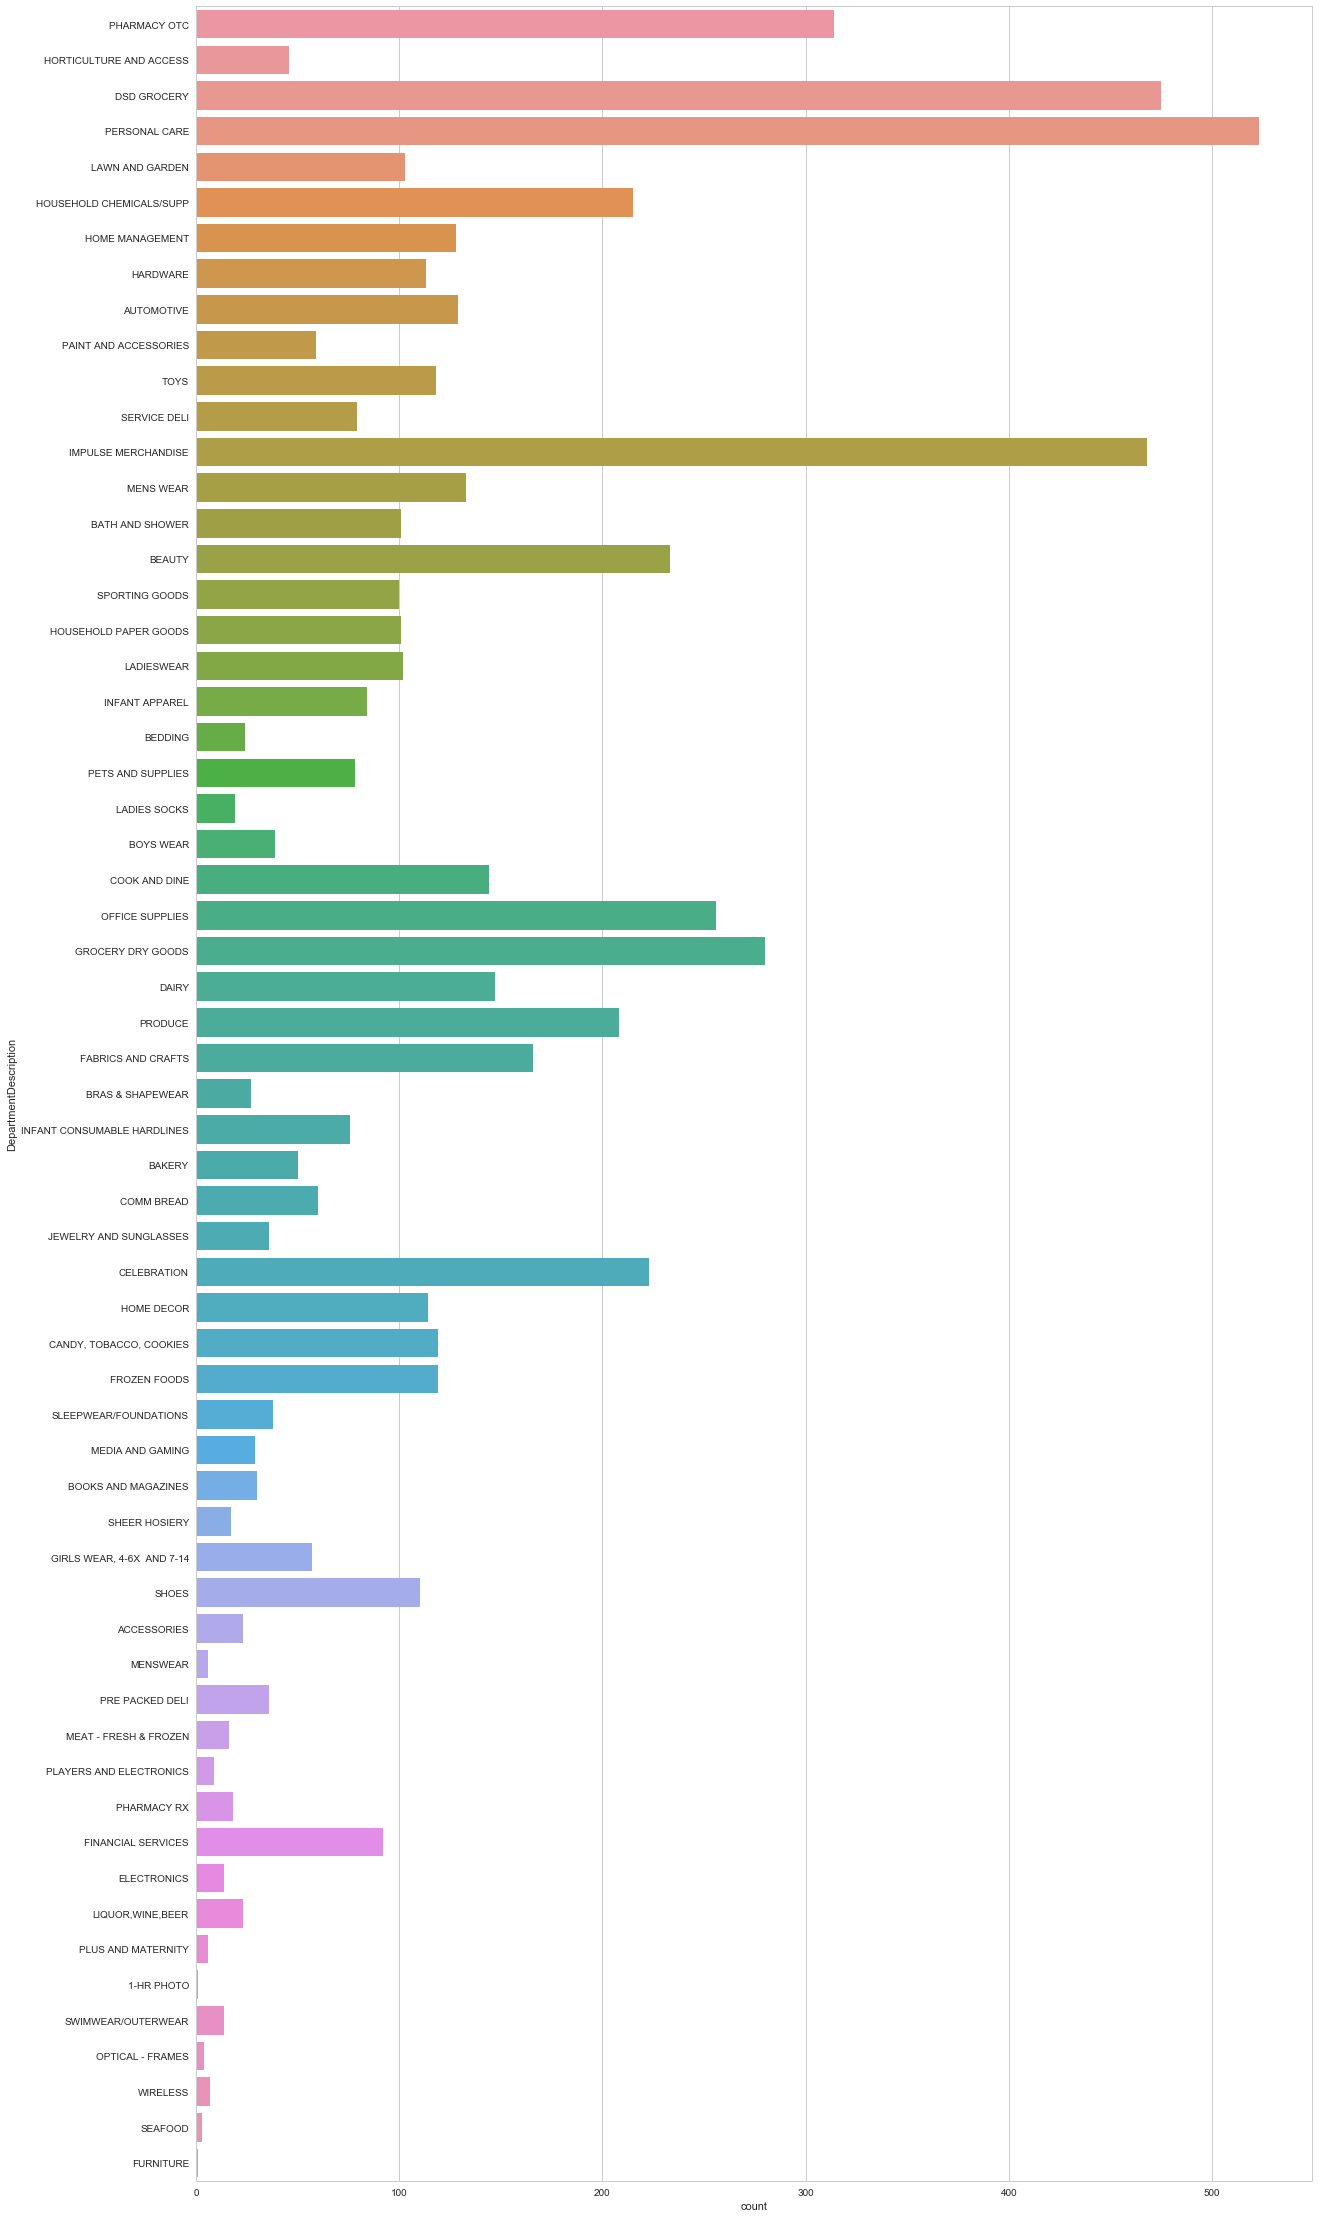

In [26]:
triptype_each = train[train['TripType'].isin([43])]
plt.figure(figsize=(20, 40))
sns.countplot(y='DepartmentDescription', data=triptype_each)
plt.show()

### 전체 데이터 대비 DepartmentDescription발생 빈도

In [ ]:
train['VisitNumber']

In [ ]:
pd.crosstab(index=)

In [29]:
vm = train.groupby(by='VisitNumber', )

In [31]:
vm